## Import lib

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
import matplotlib.image as mpimg
%matplotlib inline

## Insert images

In [2]:
smoothing_filter_image = r'/home/nguyen/PycharmProjects/pythonopencv/images/Fig0333(a)(test_pattern_blurring_orig).tif'
median_filter_image = r'/home/nguyen/PycharmProjects/pythonopencv/images/Fig0335(a)(ckt_board_saltpep_prob_pt05).tif'
laplace_filter_image = r'/home/nguyen/PycharmProjects/pythonopencv/images/Fig0338(a)(blurry_moon).tif'
gradient_filter_image = r'/home/nguyen/PycharmProjects/pythonopencv/images/Fig0343(a)(skeleton_orig).tif'
max_filter_image = r'/home/nguyen/PycharmProjects/pythonopencv/images/Fig0316(4)(bottom_left).tif'
min_filter_image = r'/home/nguyen/PycharmProjects/pythonopencv/images/Fig0316(1)(top_left).tif'
unsharp_highboost_image = r'/home/nguyen/PycharmProjects/pythonopencv/images/Fig0340(a)(dipxe_text).tif'
composite_Laplacian_image = r'/home/nguyen/PycharmProjects/pythonopencv/images/Fig0327(a)(tungsten_original).tif'

## Calculate the output size after convolution

In [3]:
def Size_after_conv(image_size,kernel_size):
    if(image_size < kernel_size):
        raise Exception('Image size is smaller kernel size ! cannot commit convolution operator')
        
    return (image_size - kernel_size)+1

## Standardize scale of image
- Images after doing substraction can cause pixels's values out of [0,255] range, so we need to set it back to this range

In [4]:
def scale_std(image):
    if len(np.where(image < 0)) > 0:
        return (np.where(image < 0,0,image))
    elif len(np.where(image > 255)) > 0:
        return (np.where(image >255,255,image))

## Convolution operator

In [5]:
def Conv(image,kernel):
    target_size = Size_after_conv(image.shape[0],kernel.shape[0])
    kernel_size = kernel.shape[0]
    output_image = np.zeros((target_size,target_size))
    for i in range(target_size):
        for j in range(target_size):
            mat = image[i:i+kernel_size,j:j+kernel_size]
            output_image[i,j] = np.sum(np.multiply(mat,kernel))
    return scale_std(output_image)
            

Test for Convolution operator

In [6]:
test_matrix = np.array([[1,2,3,4,5],
         [6,7,8,9,10],
         [1,2,3,4,5],
         [6,7,8,9,10],
         [1,2,3,4,5]])
kernel = np.array([[1/9 , 1/9 , 1/9],
                   [1/9 , 1/9 , 1/9],
                   [1/9 , 1/9 , 1/9]])

Conv(test_matrix,kernel)

array([[3.66666667, 4.66666667, 5.66666667],
       [5.33333333, 6.33333333, 7.33333333],
       [3.66666667, 4.66666667, 5.66666667]])

## Padding function

In [7]:
# To keep the image resolution unchange, we need to add zeros padding layer into border of input image
# Number of necessary padding to make input unchange = (filter_size - 1)/2
# Total of padding = padding * 4
# E.g: input 500x500 with filter kernel 11x11 will have padding (11-1)/2 = 5 for each border side of image, then
# after padding image will have the size 4*5 + 500 = 520x520 !
def Pad(image,kernel_size):
    padding_layer = (int)((kernel_size -1)/2) # as kernel side is odd we assure that padding layer has integer value
    return np.pad(image,((padding_layer,padding_layer),(padding_layer,padding_layer)),'constant',constant_values=0)

## Subtraction operator

In [8]:
def Sub(image_1, image_2):
    output = (image_1 - image_2)
    output = np.where(output < 0, 0 ,output)
    return output

def Add(image_1 , image_2):
    output = (image_1 + image_2)
    output = np.where(output > 255, 255 ,output)
    return output   

def Dot(image_1, image_2):
    output = np.dot(image_1,image_2)
    output = np.where(output > 255, 255 ,output)
    return output  
    

# 1.Smoothing (Average) Filter implementation (Linear filter)

### Determine kernel

In [9]:
# average kernel
a_kernel_3 = np.full((3,3),fill_value= 1/9)
a_kernel_5 = np.full((5,5),fill_value= 1/25)
a_kernel_11 = np.full((11,11),fill_value= 1/121)
a_kernel_21 = np.full((21,21),fill_value= 1/441)

### Using box filter kernel

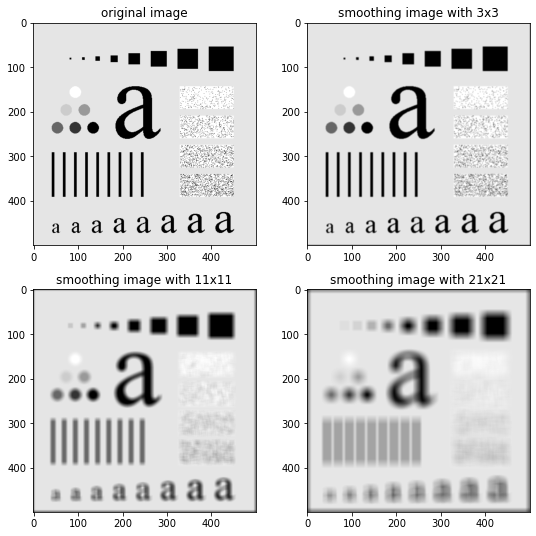

In [10]:
image = mpimg.imread(smoothing_filter_image)
smoothing_image_3 = Conv(Pad(image,3),a_kernel_3)
smoothing_image_11 = Conv(Pad(image,11),a_kernel_11)
smoothing_image_21 = Conv(Pad(image,21),a_kernel_21)


fig = plt.figure(figsize=(9, 9))
fig.add_subplot(2, 2, 1)
plt.imshow(image,cmap=plt.get_cmap('gray'))
plt.title('original image')
fig.add_subplot(2, 2, 2)
plt.imshow(smoothing_image_3,cmap=plt.get_cmap('gray'))
plt.title('smoothing image with 3x3')
fig.add_subplot(2, 2, 3)
plt.imshow(smoothing_image_11,cmap=plt.get_cmap('gray'))
plt.title('smoothing image with 11x11')
fig.add_subplot(2, 2, 4)
plt.imshow(smoothing_image_21,cmap=plt.get_cmap('gray'))
plt.title('smoothing image with 21x21')
plt.show()

### Define Gaussian kernel

In [52]:
# define 1 dimension Gaussian filter.
def Gaussian_distribution(x, sigma):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-np.power(x ,2) / (2*np.power(sigma,2)))

def Gaussian_kernel(size,sigma = 1):
    kernel_1D = np.linspace(-(size//2),(size//2),size)
    for i in range(size):
        kernel_1D[i] = Gaussian_distribution(kernel_1D[i],sigma) # Gaussian distribution function
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T) # multiplication of matrix
    kernel_2D *= 1.0 / kernel_2D.sum() # normalize
    return kernel_2D

### Using Gaussian kernel

(500, 500)


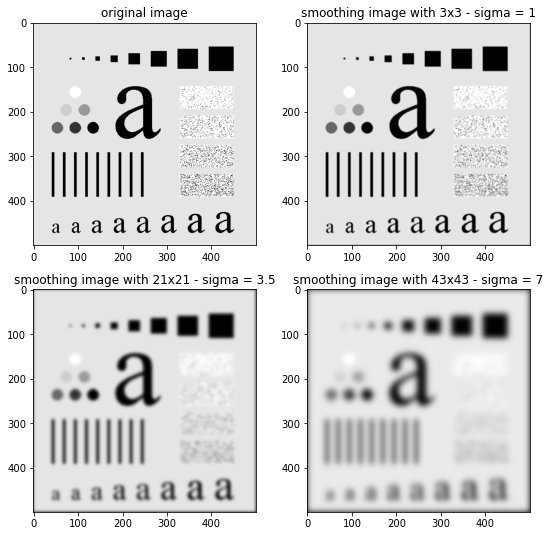

In [53]:
smoothing_image_3 = Conv(Pad(image,3),Gaussian_kernel(3)) # smoothing image with 3x3 Gaussian kernel
smoothing_image_11 = Conv(Pad(image,21),Gaussian_kernel(21,sigma = 3.5))# smoothing image with 11x11 Gaussian kernel
smoothing_image_21 = Conv(Pad(image,43),Gaussian_kernel(43,sigma = 7))# smoothing image with 21x21 Gaussian kernel
print(smoothing_image_21.shape)

fig = plt.figure(figsize=(9, 9))
fig.add_subplot(2, 2, 1)
plt.imshow(image,cmap=plt.get_cmap('gray'))
plt.title('original image')
fig.add_subplot(2, 2, 2)
plt.imshow(smoothing_image_3,cmap=plt.get_cmap('gray'))
plt.title('smoothing image with 3x3 - sigma = 1')
fig.add_subplot(2, 2, 3)
plt.imshow(smoothing_image_11,cmap=plt.get_cmap('gray'))
plt.title('smoothing image with 21x21 - sigma = 3.5')
fig.add_subplot(2, 2, 4)
plt.imshow(smoothing_image_21,cmap=plt.get_cmap('gray'))
plt.title('smoothing image with 43x43 - sigma = 7')
plt.show()

# 2.Order - statistic filter implementation (Nonlinear filter implementation)

### Define Median filter
- Median filters provide excellent noise reduction capabilities for certain types of random noise, with considerably less blurring than linear smoothing filters of similar size. Median filters are particularly effective in the presence of impulse noise

In [13]:
def Median_filter(image,kernel_size):
    target_size = Size_after_conv(image.shape[0],kernel_size)
    output = np.zeros((target_size,target_size))
    for i in range(target_size):
        for j in range(target_size):
            mat = image[i:i+kernel_size,j:j+kernel_size]
            output[i,j] = np.median(sorted(mat.flatten()))
    return np.around(output)

### Using Median filter

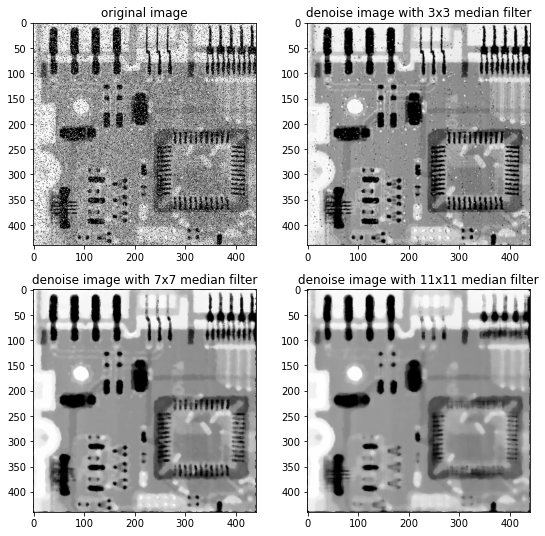

In [14]:
salt_pp_image = mpimg.imread(median_filter_image)
salt_pp_image = cv2.resize(salt_pp_image, dsize=(440, 440), interpolation=cv2.INTER_CUBIC)
denoise_image_3 = Median_filter(Pad(salt_pp_image,3),3) # applying median filter to denoise salt and pepper noise with  3x3 kernel
denoise_image_7 = Median_filter(Pad(salt_pp_image,7),7) # applying median filter to denoise salt and pepper noise with  7x7 kernel
denoise_image_11 = Median_filter(Pad(salt_pp_image,11),11) # applying median filter to denoise salt and pepper noise with  11x11 kernel


fig = plt.figure(figsize=(9, 9))
fig.add_subplot(2, 2, 1)
plt.imshow(salt_pp_image,cmap=plt.get_cmap('gray'))
plt.title('original image')
fig.add_subplot(2, 2, 2)
plt.imshow(denoise_image_3,cmap=plt.get_cmap('gray'))
plt.title('denoise image with 3x3 median filter')
fig.add_subplot(2, 2, 3)
plt.imshow(denoise_image_7,cmap=plt.get_cmap('gray'))
plt.title('denoise image with 7x7 median filter')
fig.add_subplot(2, 2, 4)
plt.imshow(denoise_image_11,cmap=plt.get_cmap('gray'))
plt.title('denoise image with 11x11 median filter')
plt.show()


### Define Max filter
- Max filter will choose the max value in the kernel box as the output pixel. The maximum filter is typically applied to an image to remove negative outlier noise.

In [15]:
def Max_filter(image,kernel_size):
    target_size = Size_after_conv(image.shape[0],kernel_size)
    output = np.zeros((target_size,target_size))
    for i in range(target_size):
        for j in range(target_size):
            mat = image[i:i+kernel_size,j:j+kernel_size]
            output[i,j] = mat.flatten().max()
    return output

### Using Max filter

(500, 500)


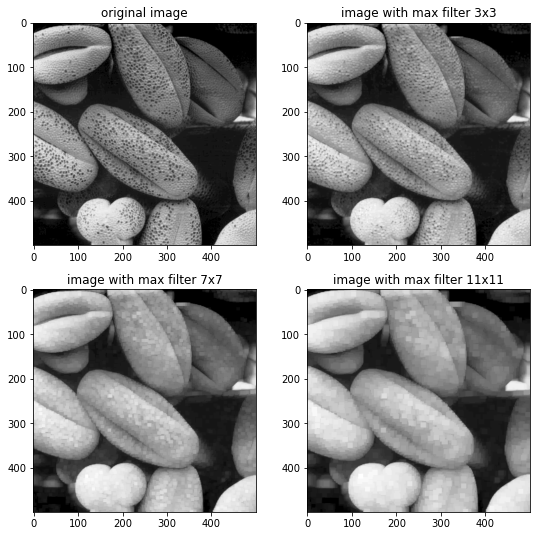

In [16]:
max_image = mpimg.imread(max_filter_image)
print(max_image.shape)
# max_image = cv2.resize(max_image, dsize=(932, 932), interpolation=cv2.INTER_CUBIC)
max_f_image_3 = Max_filter(Pad(max_image,3),3) # applying min filter with  3x3 kernel
max_f_image_7 = Max_filter(Pad(max_image,7),7) # applying min filter with  5x5 kernel
max_f_image_11 = Max_filter(Pad(max_image,11),11) # applying min filter with 11x11 kernel

fig = plt.figure(figsize=(9, 9))
fig.add_subplot(2, 2, 1)
plt.imshow(max_image,cmap=plt.get_cmap('gray'))
plt.title('original image')
fig.add_subplot(2, 2, 2)
plt.imshow(max_f_image_3,cmap=plt.get_cmap('gray'))
plt.title('image with max filter 3x3')
fig.add_subplot(2, 2, 3)
plt.imshow(max_f_image_7,cmap=plt.get_cmap('gray'))
plt.title('image with max filter 7x7')
fig.add_subplot(2, 2, 4)
plt.imshow(max_f_image_11,cmap=plt.get_cmap('gray'))
plt.title('image with max filter 11x11')
plt.show()

### Define Min filter
- Min filter will choose the min value in the kernel box as the output pixel. The minimum filter is typically applied to an image to remove positive outlier noise.

In [17]:
def Min_filter(image,kernel_size):
    target_size = Size_after_conv(image.shape[0],kernel_size)
    output = np.zeros((target_size,target_size))
    for i in range(target_size):
        for j in range(target_size):
            mat = image[i:i+kernel_size,j:j+kernel_size]
            output[i,j] = mat.flatten().min()
    return output

### Using Min filter

(500, 500)


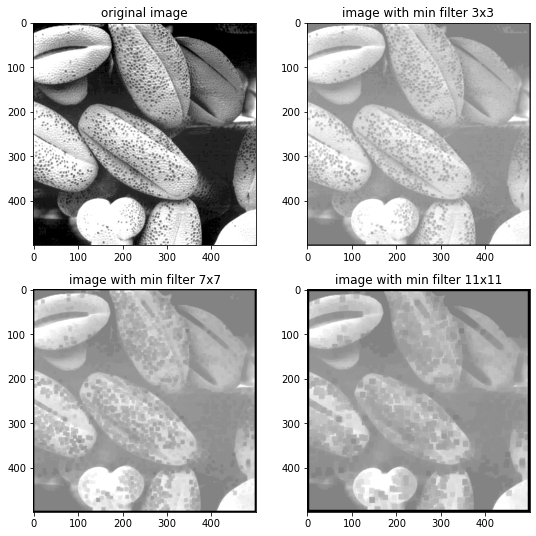

In [18]:
min_image = mpimg.imread(min_filter_image)
print(max_image.shape)
min_f_image_3 = Min_filter(Pad(min_image,3),3) # applying min filter with  3x3 kernel
min_f_image_7 = Min_filter(Pad(min_image,7),7)# applying min filter with  5x5 kernel
min_f_image_11 = Min_filter(Pad(min_image,11),11)# applying min filter with  11x11 kernel

fig = plt.figure(figsize=(9, 9))
fig.add_subplot(2, 2, 1)
plt.imshow(min_image,cmap=plt.get_cmap('gray'))
plt.title('original image')
fig.add_subplot(2, 2, 2)
plt.imshow(min_f_image_3,cmap=plt.get_cmap('gray'))
plt.title('image with min filter 3x3')
fig.add_subplot(2, 2, 3)
plt.imshow(min_f_image_7,cmap=plt.get_cmap('gray'))
plt.title('image with min filter 7x7')
fig.add_subplot(2, 2, 4)
plt.imshow(min_f_image_11,cmap=plt.get_cmap('gray'))
plt.title('image with min filter 11x11')
plt.show()

# Shaperning Spatial filter

### Define mask of Laplacian 
- As a derivative operator, Laplacian kernel highlight sharp intensity transition and de-emphasize regions with slowly change on intensities. This will created grayish edge lines and dark-featureless background image.
- Fortunately, the background features can still be recovered by adding Laplacian image to original image.

- Composite kernel is define when we add laplace kernel with addition kernel with center = 1

In [19]:
laplace_kernel = np.array([[0,-1,0],
                          [-1,4,-1],
                          [0,-1,0]])

laplace_kernel_2 = np.array([[-1,-1,-1],
                          [-1,8,-1],
                          [-1,-1,-1]])

addition_kernel = np.array([[0,0,0],
                    [0,1,0],
                    [0,0,0]])

### Using Laplacian mask filter

(520, 520)


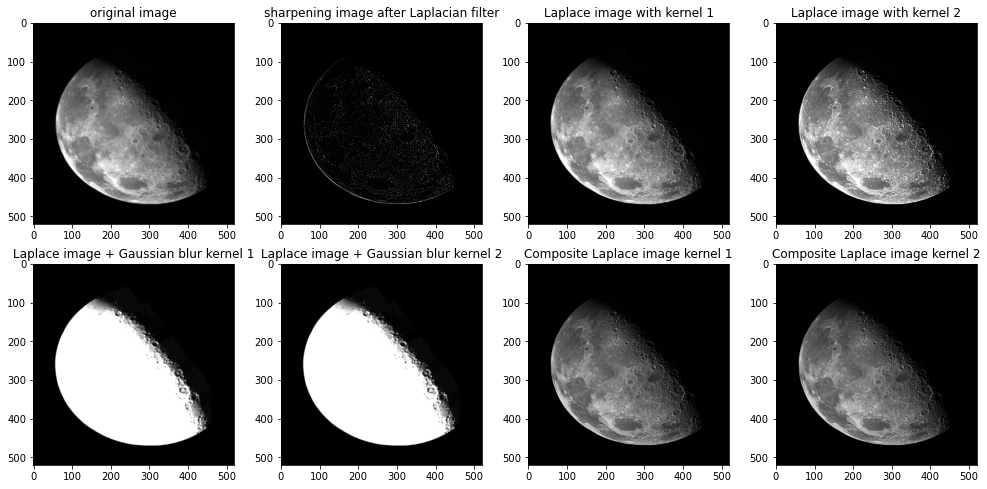

In [20]:
# the forth image is adjusted by apply Gausian blur to decrease high frequency as Laplacian filter is sensitive 
# with noise.

# Laplacian kernel center > 0: f(x,y) + m(x,y)
# Laplacian kernel center < 0: f(x,y) - m(x,y)

laplace_image = mpimg.imread(laplace_filter_image)
laplace_image = cv2.resize(laplace_image, dsize=(520, 520), interpolation=cv2.INTER_CUBIC)
print(laplace_image.shape)
laplace_image_3_k0 = Conv(Pad(laplace_image,3),laplace_kernel) # convolute image with laplace kernel 1.
laplace_image_3_k1 = Add(laplace_image,Conv(Pad(laplace_image,3),laplace_kernel)) # Add orignal image with product of convolution(image,laplace_kernel_1)
laplace_image_3_k2 = Add(laplace_image,Conv(Pad(laplace_image,3),laplace_kernel_2)) # Add orignal image with product of convolution(image,laplace_kernel_2)
laplace_image_3_k3 = Add(Conv(Pad(laplace_image,3),Gaussian_kernel(3,sigma=1)) ,Conv(Pad(laplace_image,3),laplace_kernel))
laplace_image_3_k4 = Add(Conv(Pad(laplace_image,3),Gaussian_kernel(3,sigma=1)) , Conv(Pad(laplace_image,3),laplace_kernel_2))
laplace_image_3_k5 = Conv(Pad(laplace_image,3),laplace_kernel + addition_kernel) # convolute image with composite kernel 1.
laplace_image_3_k6 = Conv(Pad(laplace_image,3),laplace_kernel_2 + 3*addition_kernel)# convolute image with composite kernel 2.

fig = plt.figure(figsize=(17, 17))
fig.add_subplot(4, 4, 1)
plt.imshow(laplace_image,cmap=plt.get_cmap('gray'))
plt.title('original image')
fig.add_subplot(4, 4, 2)
plt.imshow(laplace_image_3_k0,cmap=plt.get_cmap('gray'))
plt.title('sharpening image after Laplacian filter')
fig.add_subplot(4, 4, 3)
plt.imshow(laplace_image_3_k1,cmap=plt.get_cmap('gray'))
plt.title('Laplace image with kernel 1')
fig.add_subplot(4, 4, 4)
plt.imshow(laplace_image_3_k2,cmap=plt.get_cmap('gray'))
plt.title('Laplace image with kernel 2')
fig.add_subplot(4, 4, 5)
plt.imshow(laplace_image_3_k3,cmap=plt.get_cmap('gray'))
plt.title('Laplace image + Gaussian blur kernel 1')
fig.add_subplot(4, 4, 6)
plt.imshow(laplace_image_3_k4,cmap=plt.get_cmap('gray'))
plt.title('Laplace image + Gaussian blur kernel 2')
fig.add_subplot(4, 4, 7)
plt.imshow(laplace_image_3_k5,cmap=plt.get_cmap('gray'))
plt.title('Composite Laplace image kernel 1')
fig.add_subplot(4, 4, 8)
plt.imshow(laplace_image_3_k6,cmap=plt.get_cmap('gray'))
plt.title('Composite Laplace image kernel 2')
plt.show()


### Define unsharp masking High-boost filtering
- When we blur the image, it's also mean we filter out high frequency in the image. Then if we substract original image with product that we just substract, we get the mask that have high frequency. Add this mask to the original image will get the image with sharper edge and line.

g_mask(x,y) = f(x,y) + f_blur(x,y) 

g(x,y) = f(x,y) + k*g_mask(x,y)
- When we adjust k = 0, it exactly called Unsharp Masking, while k > 0  will yield highboost filtering. However with k < = 0 will cause decreasing in unsharp mask.

    
  

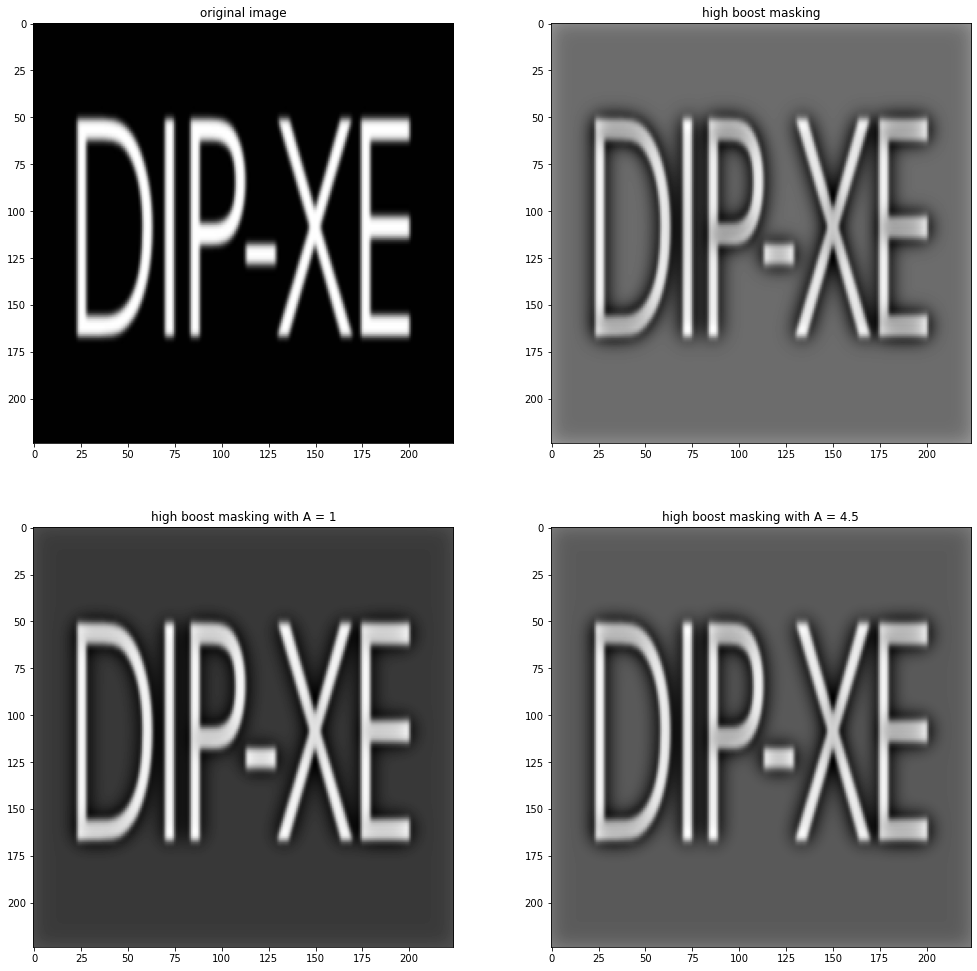

In [55]:
A_1 = 1
A_2 = 4.5
unmasking_image = mpimg.imread(unsharp_highboost_image)
unmasking_image = cv2.resize(unmasking_image, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
unsharp_mask = unmasking_image - Conv(Pad(unmasking_image,31),Gaussian_kernel(31,sigma=5)) 
high_boost_masking_1 = unmasking_image + A_1*unsharp_mask # k = 1 so we do unsharp_mask
high_boost_masking_2 = unmasking_image + A_2*unsharp_mask # k = 4.5 > 1 so we do high boost


fig = plt.figure(figsize=(17, 17))
fig.add_subplot(2, 2, 1)
plt.imshow(unmasking_image,cmap=plt.get_cmap('gray'))
plt.title('original image')
fig.add_subplot(2, 2, 2)
plt.imshow(unsharp_mask,cmap=plt.get_cmap('gray'))
plt.title('high boost masking')
fig.add_subplot(2, 2, 3)
plt.imshow(high_boost_masking_1,cmap=plt.get_cmap('gray'))
plt.title('high boost masking with A = 1')
fig.add_subplot(2, 2, 4)
plt.imshow(high_boost_masking_2,cmap=plt.get_cmap('gray'))
plt.title('high boost masking with A = 4.5')


plt.show()

### Define Gradient mask
grad(f) = [g_x, g_y] will point in the direction of the greatest rate of change of f(x,y) at pixel (x,y).
The gradient can be used also to highlight small specs that may not be readily visible in a gray-scale image

In [57]:
sobel_kernel_1 = np.array([[-1,-2,-1],
                          [0,0,0],
                          [1,2,1]])

sobel_kernel_2 = np.array([[-1,0,1],
                          [-2,0,2],
                          [-1,0,1]])

### Using Gradient mask

(650, 650)


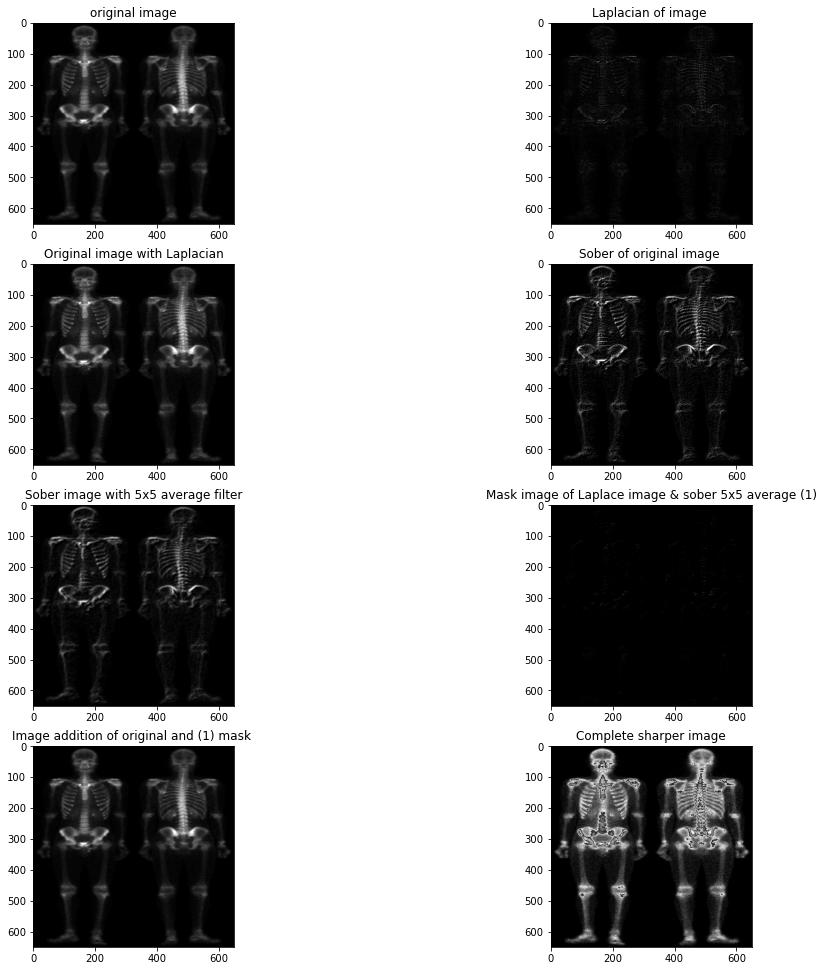

In [65]:
gamma = 3.0
ungradient_image = mpimg.imread(gradient_filter_image)
ungradient_image = cv2.resize(ungradient_image, dsize=(650, 650), interpolation=cv2.INTER_CUBIC)
print(ungradient_image.shape)
laplace_sharp = Conv(Pad(ungradient_image,3),laplace_kernel) # Convolution of image and laplace kernel (1)
laplace_image = Add(ungradient_image , laplace_sharp) # add (1) and original image to generate laplace_image (2)
sober_image = Add(Conv(Pad(ungradient_image,3),sobel_kernel_1) ,Conv(Pad(ungradient_image,3),sobel_kernel_2) ) # Create gradient image (3)
sober_smooth_average = Conv(Pad(sober_image,5),a_kernel_5) # Bluring (3) by convolute with average kernel 5x5 (4)
mask_LP_image_sober_smooth = Sub(laplace_sharp,sober_smooth_average) # Substract (1) to (4) to get the mask  (5)
shaper_image_mask_LP_sober = Add(ungradient_image , mask_LP_image_sober_smooth) # Add (5) with original image to get complete sharper image (6)
complete_shaper_image = np.array(255*(shaper_image_mask_LP_sober/255)*gamma,dtype = 'uint8') # Applying power law tranformation to (6)


fig = plt.figure(figsize=(17, 17))
fig.add_subplot(4, 2, 1)
plt.imshow(ungradient_image,cmap=plt.get_cmap('gray'))
plt.title('original image')
fig.add_subplot(4, 2, 2)
plt.imshow(laplace_sharp,cmap=plt.get_cmap('gray'))
plt.title('Laplacian of image ')
fig.add_subplot(4, 2, 3)
plt.imshow(laplace_image,cmap=plt.get_cmap('gray'))
plt.title('Original image with Laplacian')
fig.add_subplot(4, 2, 4)
plt.imshow(sober_image,cmap=plt.get_cmap('gray'))
plt.title('Sober of original image ')
fig.add_subplot(4, 2, 5)
plt.imshow(sober_smooth_average,cmap=plt.get_cmap('gray'))
plt.title('Sober image with 5x5 average filter')
fig.add_subplot(4, 2, 6)
plt.imshow(mask_LP_image_sober_smooth,cmap=plt.get_cmap('gray'))
plt.title('Mask image of Laplace image & sober 5x5 average (1)')
fig.add_subplot(4, 2, 7)
plt.imshow(shaper_image_mask_LP_sober,cmap=plt.get_cmap('gray'))
plt.title('Image addition of original and (1) mask ')
fig.add_subplot(4, 2, 8)
plt.imshow(complete_shaper_image,cmap=plt.get_cmap('gray'))
plt.title('Complete sharper image')

plt.show()